In [1]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we import our data

df1 = pd.read_excel(r'C:/Users/erens/OneDrive/Bureau/Master in Finance/exchange/ISEG/Programming techniques/project/CMC.xlsx')
df2 = pd.read_excel(r'C:/Users/erens/OneDrive/Bureau/Master in Finance/exchange/ISEG/Programming techniques/project/X.xlsx')
df3 = pd.read_excel(r'C:/Users/erens/OneDrive/Bureau/Master in Finance/exchange/ISEG/Programming techniques/project/STLD.xlsx')
df4 = pd.read_excel(r'C:/Users/erens/OneDrive/Bureau/Master in Finance/exchange/ISEG/Programming techniques/project/RS.xlsx')
df5 = pd.read_excel(r'C:/Users/erens/OneDrive/Bureau/Master in Finance/exchange/ISEG/Programming techniques/project/NUE.xlsx')
df6 = pd.read_excel(r'C:/Users/erens/OneDrive/Bureau/Master in Finance/exchange/ISEG/Programming techniques/project/MT.xlsx')

In [3]:
# we create a dataframe of the index (sum of the 6 companies)

df_index = pd.DataFrame(columns=['Current_assets','Assets','Common_shares_outstanding','Debt_in_current_liabilities','Long_term_debt','Net_income','Sales'])

In [4]:
# I extracted the colum date of one of the existing df to insert it in my new df
extracted_date = df1["date"]
#display(extracted_date)
df_index.insert(0,"date", extracted_date)

In [5]:
# Now let's fill up our dataframe

df_index["Current_assets"] = (df1.actq + df2.actq + df3.actq + df4.actq + df5.actq + df6.actq)
df_index["Assets"] = (df1.atq + df2.atq + df3.atq + df4.atq + df5.atq + df6.atq)
df_index["Common_shares_outstanding"] = (df1.cshoq + df2.cshoq + df3.cshoq + df4.cshoq + df5.cshoq + df6.cshoq)
df_index["Debt_in_current_liabilities"] = (df1.dlcq + df2.dlcq + df3.dlcq + df4.dlcq + df5.dlcq + df6.dlcq)
df_index["Long_term_debt"] = (df1.dlttq + df2.dlttq + df3.dlttq + df4.dlttq + df5.dlttq + df6.dlttq)
df_index["Net_income"] = (df1.niq + df2.niq + df3.niq + df4.niq + df5.niq + df6.niq)
df_index["Sales"] = (df1.saleq + df2.saleq + df3.saleq + df4.saleq + df5.saleq + df6.saleq)
df_index["Market_cap"] = (df1.prccq*df1.cshoq + df2.prccq*df2.cshoq + df3.prccq*df3.cshoq + df4.prccq*df4.cshoq + df5.prccq*df5.cshoq + df6.prccq*df6.cshoq)

In [6]:
df_index

,date,Current_assets,Assets,Common_shares_outstanding,Debt_in_current_liabilities,Long_term_debt,Net_income,Sales,Market_cap
0,2002-12-31,7077.724,21471.589,412.305,316.584,5452.631,138.411,5785.424,6557.570310
1,2003-03-31,7502.674,21886.928,412.669,330.872,5370.026,55.072,6053.414,5839.899810
2,2003-06-30,7977.630,22933.171,412.713,341.729,5785.863,-11.731,6690.574,7826.554430
3,2003-09-30,7893.522,23212.538,413.224,471.929,5928.411,-315.690,6953.288,8171.043350
4,2003-12-31,8227.552,22202.555,413.186,550.969,6130.751,48.615,7275.941,12029.271410
...,...,...,...,...,...,...,...,...,...
75,2021-09-30,65111.225,155800.535,1910.076,2824.522,21744.244,10289.519,47472.557,87915.874340
76,2021-12-31,68738.056,160943.564,1825.402,3006.818,21523.717,9109.112,48073.570,92254.368700
77,2022-03-31,79126.234,174030.925,1792.444,3429.130,22816.467,9113.168,49627.872,109804.238450
78,2022-06-30,80280.289,178770.073,1715.756,4610.686,22216.050,9557.016,53636.279,78031.627130


In [7]:
# Now we create the dataframe with the variable we want to use for our regression

df_reg = pd.DataFrame(columns = [])
df_reg.insert(0,"date", df1["date"])
df_reg['Market_cap'] = df_index.Market_cap
df_reg['Total_asset_turnover_ratio'] = (df_index.Sales/df_index.Assets)
df_reg['Debt_ratio'] = (df_index.Long_term_debt + df_index.Debt_in_current_liabilities)/df_index.Assets
df_reg['Current_ratio'] = df_index.Current_assets/(df_index.Long_term_debt + df_index.Debt_in_current_liabilities)
df_reg['PE_ratio'] = df_reg.Market_cap / df_index.Net_income
df_reg['Net_profit_margin'] = df_index.Net_income / df_index.Sales
df_reg['Book_value'] = (df_index.Assets - (df_index.Long_term_debt + df_index.Debt_in_current_liabilities))/df_reg.Market_cap

In [8]:
df_reg

,date,Market_cap,Total_asset_turnover_ratio,Debt_ratio,Current_ratio,PE_ratio,Net_profit_margin,Book_value
0,2002-12-31,6557.570310,0.269446,0.268691,1.226809,47.377523,0.023924,2.394541
1,2003-03-31,5839.899810,0.276577,0.260470,1.316051,106.041179,0.009098,2.771628
2,2003-06-30,7826.554430,0.291742,0.267193,1.301919,-667.168564,-0.001753,2.147251
3,2003-09-30,8171.043350,0.299549,0.275728,1.233297,-25.883124,-0.045402,2.057534
4,2003-12-31,12029.271410,0.327707,0.300944,1.231352,247.439502,0.006682,1.290256
...,...,...,...,...,...,...,...,...
75,2021-09-30,87915.874340,0.304701,0.157694,2.650163,8.544216,0.216747,1.492697
76,2021-12-31,92254.368700,0.298698,0.152417,2.802143,10.127702,0.189483,1.478662
77,2022-03-31,109804.238450,0.285167,0.150810,3.014838,12.048965,0.183630,1.345898
78,2022-06-30,78031.627130,0.300029,0.150063,2.992548,8.164853,0.178182,1.947202


In [9]:
#set date as index again in df_reg

df_reg = df_reg.set_index("date")

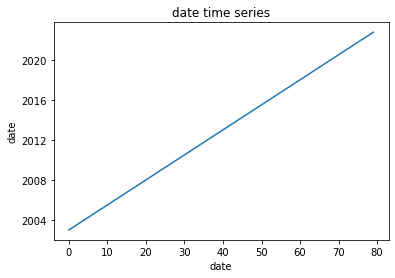

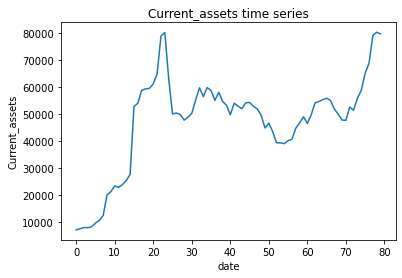

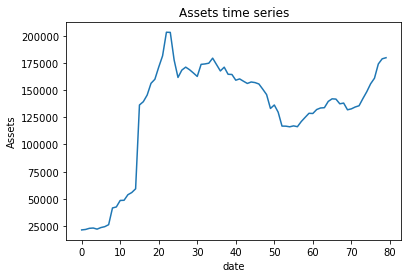

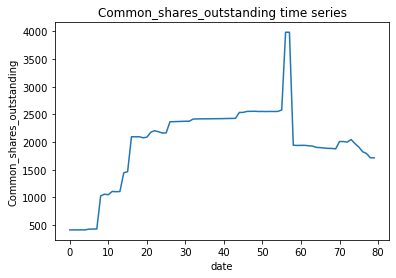

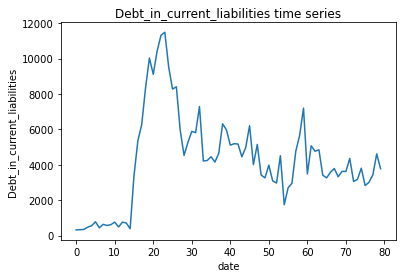

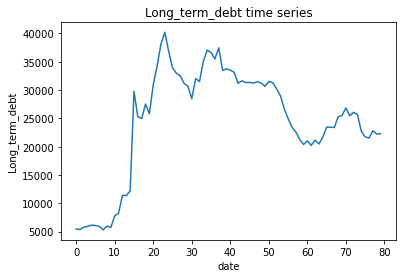

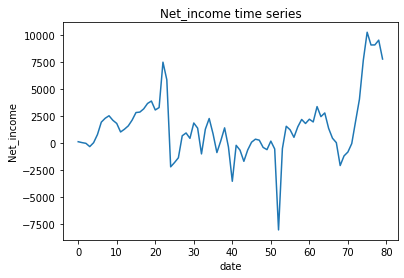

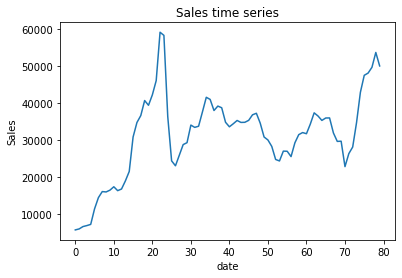

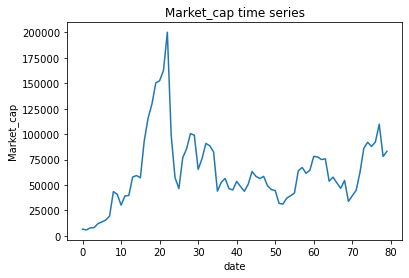

Text(0.5, 1.0, 'Market cap time series')

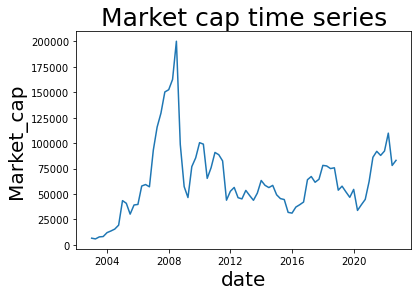

In [10]:
####data exploring, to see if the time series make sense


for i in df_index.columns:
    plt.plot(df_index.index, df_index[i])
    plt.xlabel("date")
    plt.ylabel(i)
    plt.title(i + ' ' + 'time series')
    plt.show()

plt.plot(df_reg.index, df_reg['Market_cap'])
plt.xlabel("date",  size = 20)
plt.ylabel("Market_cap", size = 20)
plt.title("Market cap time series", size = 25)

In [11]:
# Multiple regression

x = df_reg[['Total_asset_turnover_ratio', 'Debt_ratio', 'Current_ratio', 'PE_ratio','Net_profit_margin', 'Book_value']]
y = df_reg['Market_cap']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 280742.7880642826
Coefficients: 
 [-2.67151236e+05 -2.19561756e+05 -2.23660557e+04  1.65825355e+00
  1.55672846e+05 -3.75128399e+04]
                            OLS Regression Results                            
Dep. Variable:             Market_cap   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.78
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           4.81e-14
Time:                        08:57:53   Log-Likelihood:                -911.32
No. Observations:                  80   AIC:                             1837.
Df Residuals:                      73   BIC:                             1853.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t     

C:\Users\erens\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
# here we can play with the number in parenthese to get the fitted value of all the indep. var.

#sm.graphics.plot_fit(model,1, vlines=False);


In [13]:
# regression taking the log of market cap

df_reg['Market_cap_log'] = df_reg['Market_cap'].apply(np.log)

X = df_reg[['Total_asset_turnover_ratio', 'Debt_ratio', 'Current_ratio', 'PE_ratio','Net_profit_margin', 'Book_value']]
logy = df_reg['Market_cap_log']

regr = linear_model.LinearRegression()
regr.fit(X, logy)
X = sm.add_constant(X)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(logy, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 16.557491952995186
Coefficients: 
 [-5.15845036e+00 -1.11489192e+01 -4.97477018e-01  1.32381116e-04
  1.43381920e+00 -5.92559950e-01]
                            OLS Regression Results                            
Dep. Variable:         Market_cap_log   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     22.84
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           5.60e-15
Time:                        08:57:53   Log-Likelihood:                -40.529
No. Observations:                  80   AIC:                             95.06
Df Residuals:                      73   BIC:                             111.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t    

C:\Users\erens\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# here we can play with the number in parenthese to get the fitted value of all the indep. var.

#sm.graphics.plot_fit(model,1, vlines=False);
